### Problem Understanding
Predicting Car Prices 

### Data Understanding
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

* name
* year
* selling_price
* km_driven
* fuel
* seller_type
* transmission
* Owner


## Getting Started

### Requirements
* Anaconda - On Windows OS install and add to root path. 
* Python 3
* VS Code (Optional)
* Necessary Libraries (numpy, pandas, matplotlib, seaborn, Scikit Learn)

### Import Libraries

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/home/paul/Mindscope/Learn/projects/car_price_prediction/car_price_prediction/car data.csv")
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [3]:
# Data Shape

data.shape

(301, 9)

In [4]:
# Showing data columns Data Type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Data Cleaning

In [9]:
# Show the sum of the null values in every columns in data

data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
# Check for Duplicate entries

data.duplicated().sum()

2

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
# Check for Duplicate entries

data.duplicated().sum()

0

In [10]:
# Showing some details about data

data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Feature Engineering

#### Age

In [11]:
# Find the maximum Year in data set

np.max(data.Year)

2018

In [12]:
# convert Year to Age of each cars

Age = 2019 - data.Year

data.insert(0, "Age", Age)
data.drop('Year', axis = 1, inplace = True)
data

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,3,city,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,city,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,city,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [15]:
# Find numeric columns in the dataframe

numeric = data.select_dtypes(["int64", "float64"])
numeric[:5]

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
0,5,3.35,5.59,27000,0
1,6,4.75,9.54,43000,0
2,2,7.25,9.85,6900,0
3,8,2.85,4.15,5200,0
4,5,4.60,6.87,42450,0


### Exploratory Data Analysis

#### Univariate Analysis

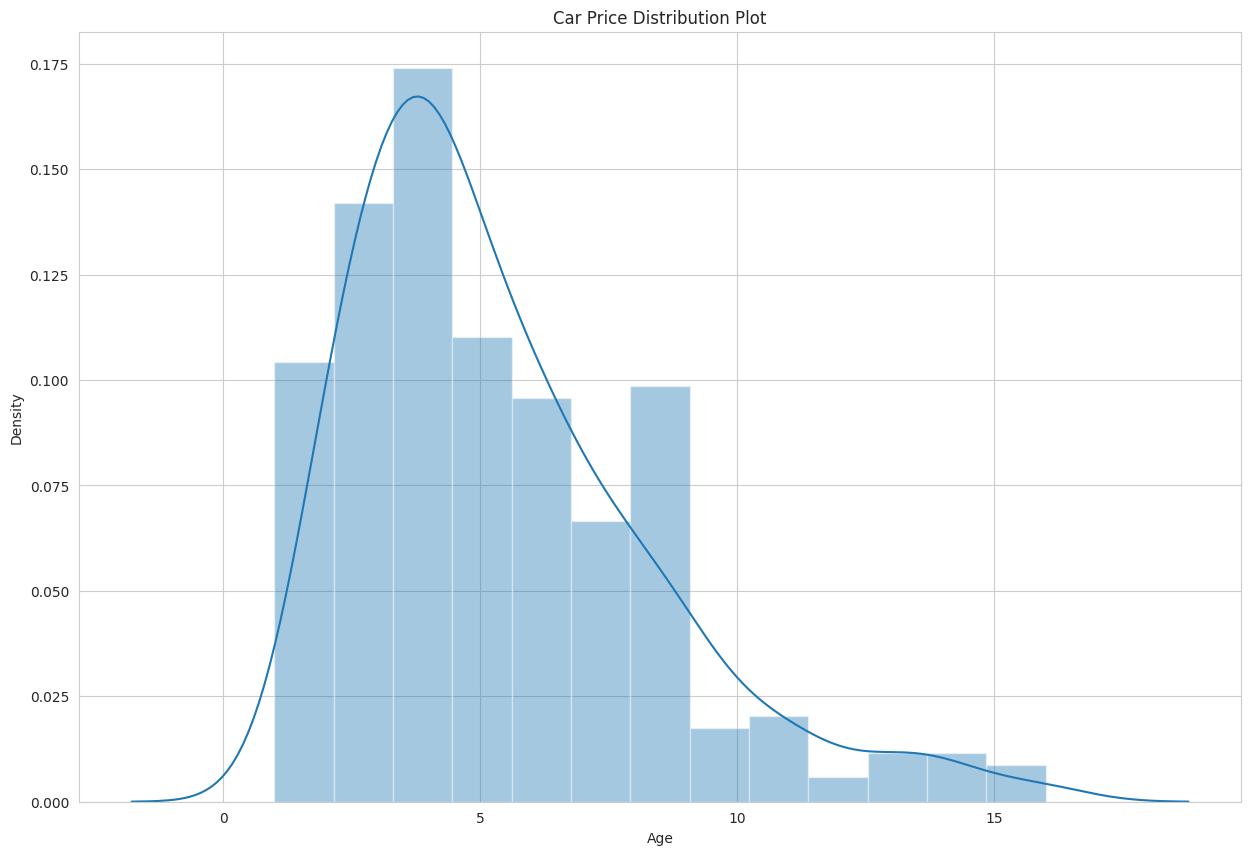

In [28]:
# Draw distribution diagram for Selling Price

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Age)
plt.title('Car Price Distribution Plot')
plt.show()

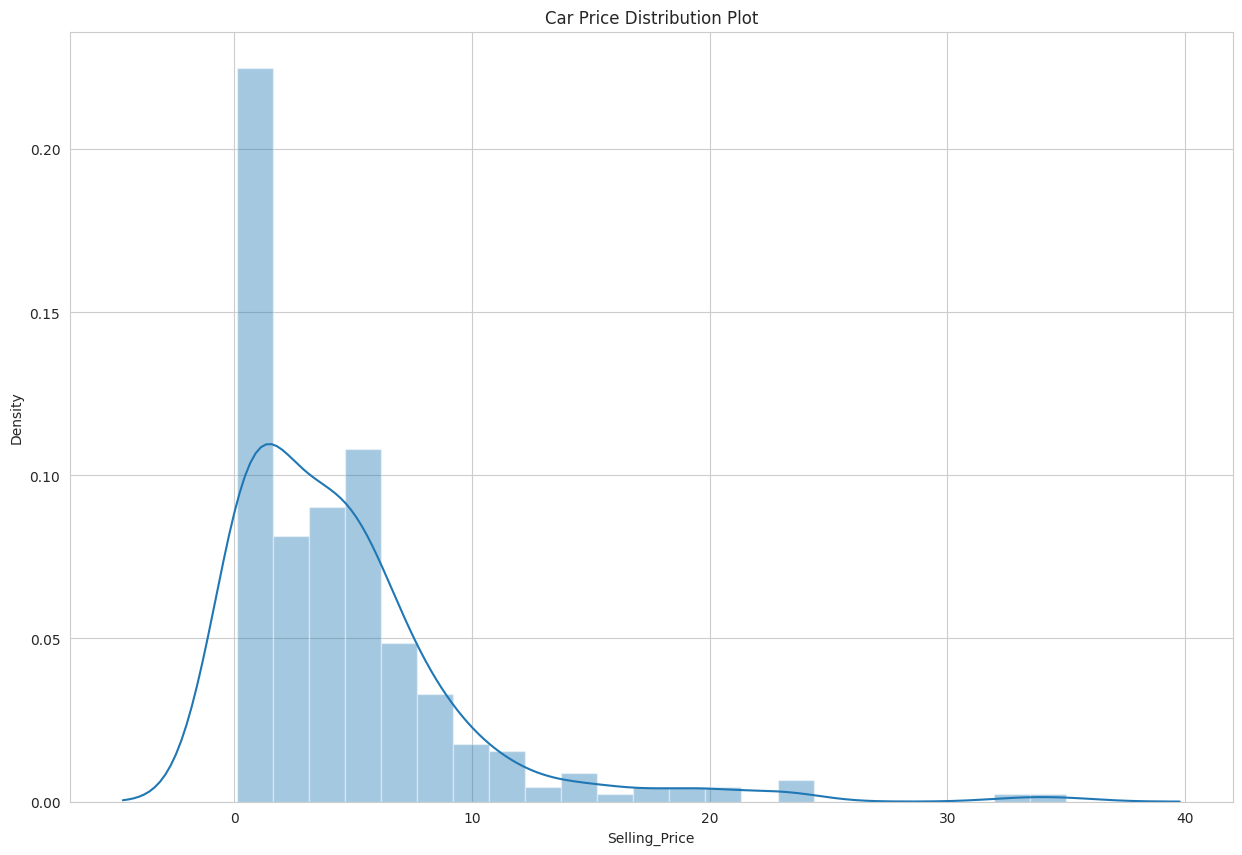

In [24]:
# Draw distribution diagram for Selling Price

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Selling_Price)
plt.title('Car Price Distribution Plot')
plt.show()

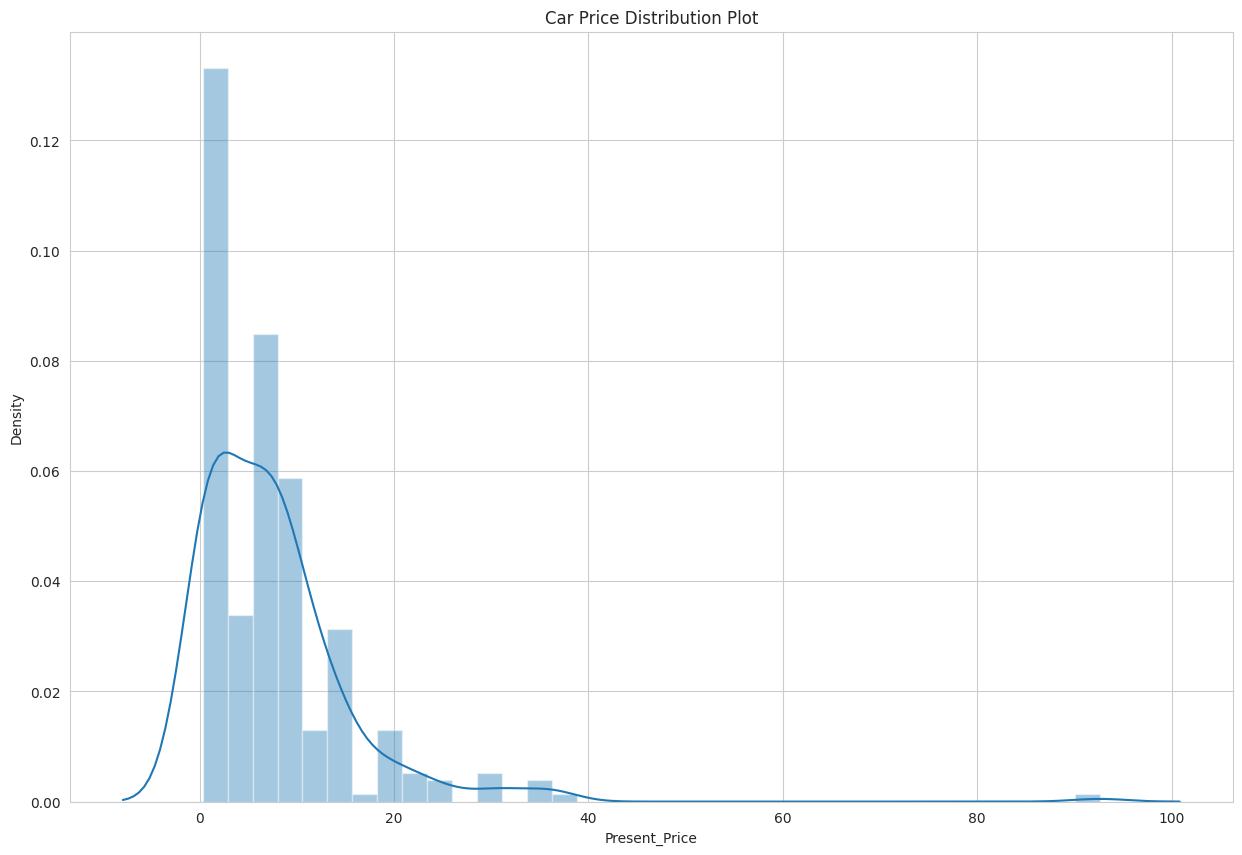

In [25]:
# Draw distribution diagram for Selling Price

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Present_Price)
plt.title('Car Price Distribution Plot')
plt.show()

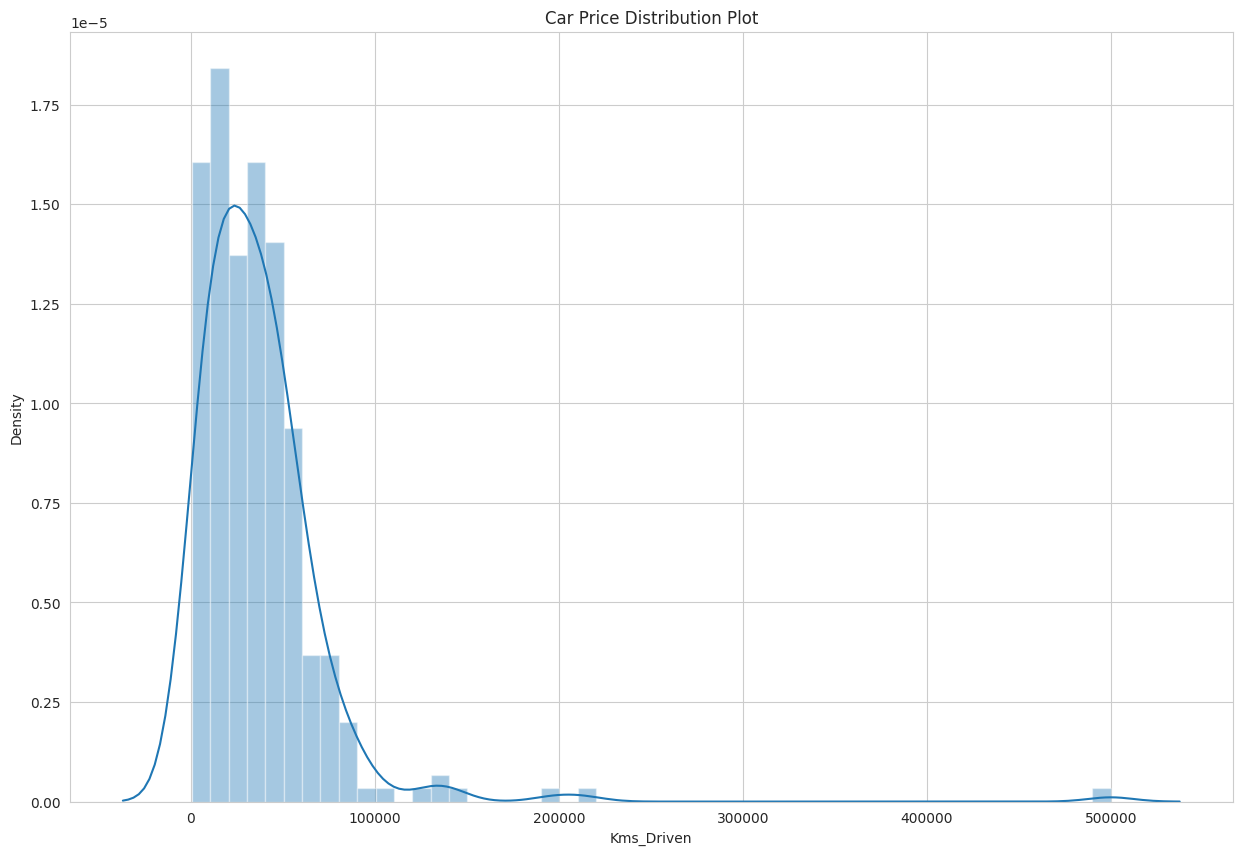

In [29]:
# Draw distribution diagram for Selling Price

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Kms_Driven)
plt.title('Car Price Distribution Plot')
plt.show()

In [30]:
# make function for count plot and scatter plots for Categorical features

def Categorical_Plot(column):
    
        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        pd.value_counts(data[column]).plot(kind='bar')
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Count\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.scatter(data[column], data.Selling_Price)
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Selling_Price\n", fontsize = 15)
        plt.ylabel("Selling_Price\n", fontsize=15)

        plt.show()
        print()

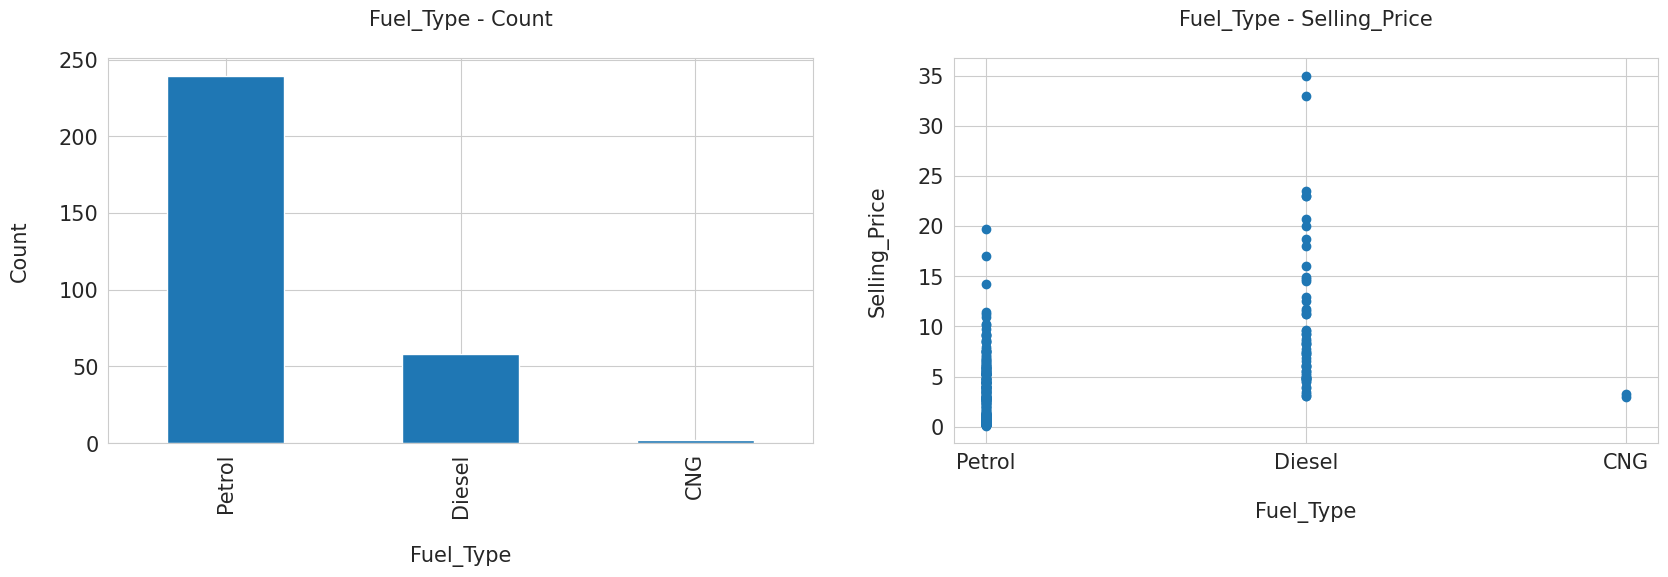

In [31]:
# call Categorical_Plot fuction for Fuel_Type

Categorical_Plot("Fuel_Type")

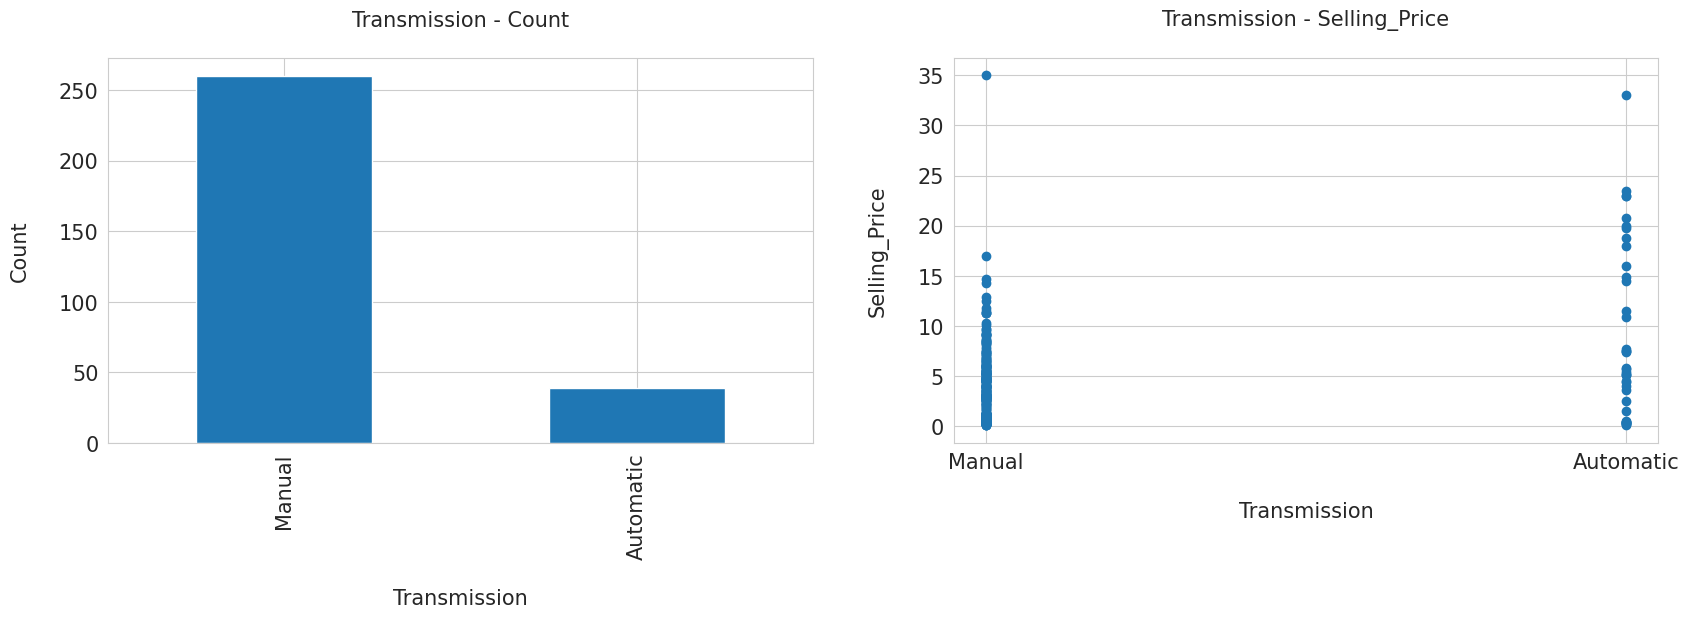

In [32]:
# call Categorical_Plot fuction for Seller_Type

Categorical_Plot("Transmission")

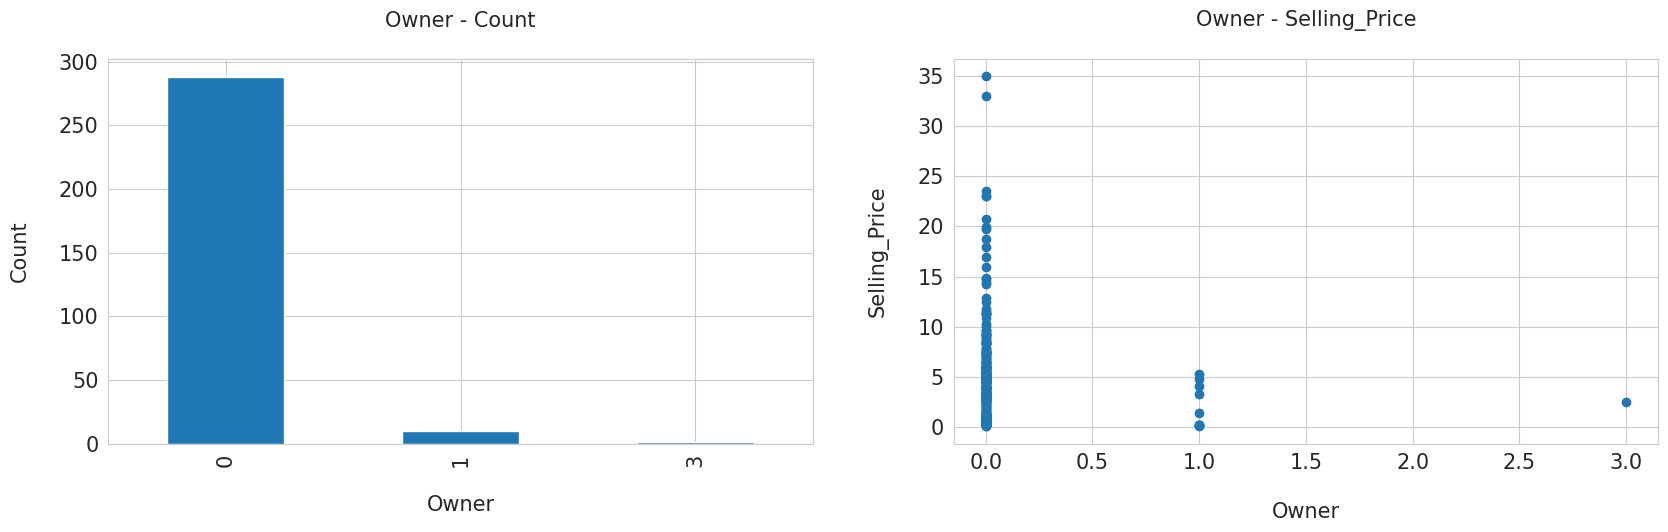

In [33]:
# call Categorical_Plot fuction for Owner

Categorical_Plot("Owner")

In [34]:
# make function for box plots and scatter plots for Numerical features

def Numerical_Plot(column):
    
        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        sns.boxplot(data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.scatter(data[column], data.Selling_Price)
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Selling_Price\n", fontsize = 15)
        plt.ylabel("Selling_Price\n", fontsize=15)

        plt.show()
        print()

#### Check for Outliers

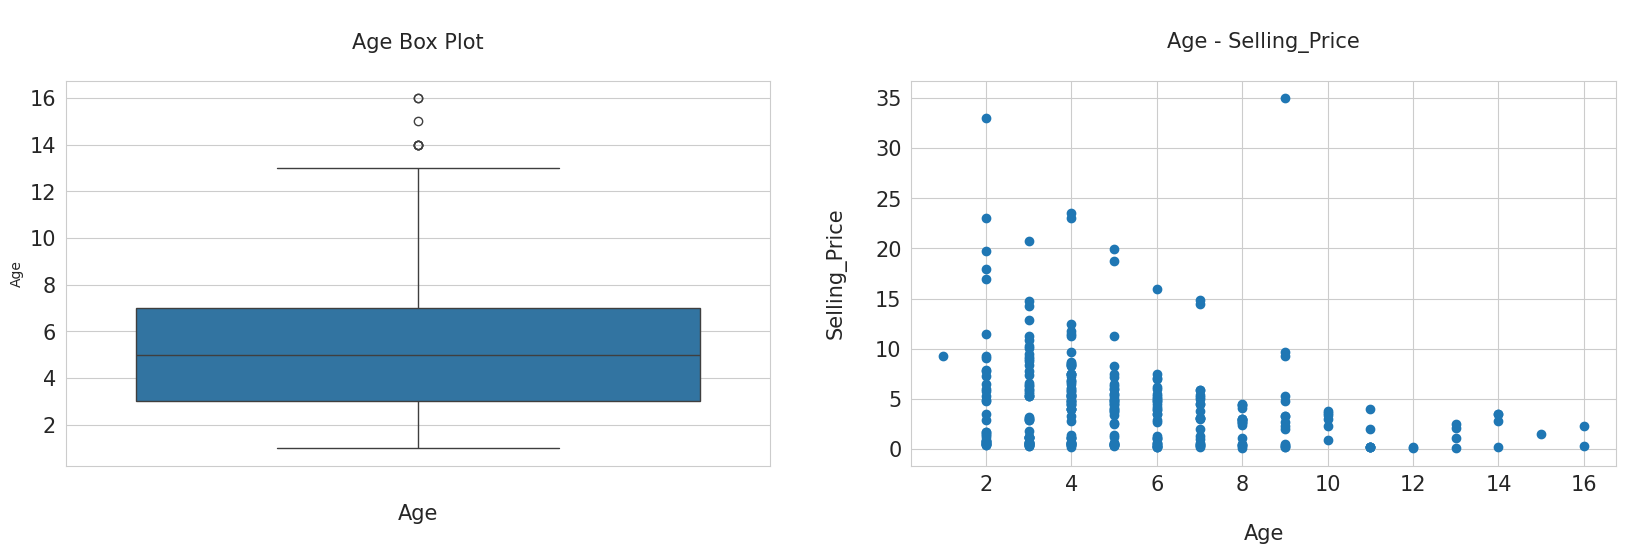

In [35]:
# call Numerical_Plot fuction for Age

Numerical_Plot("Age")

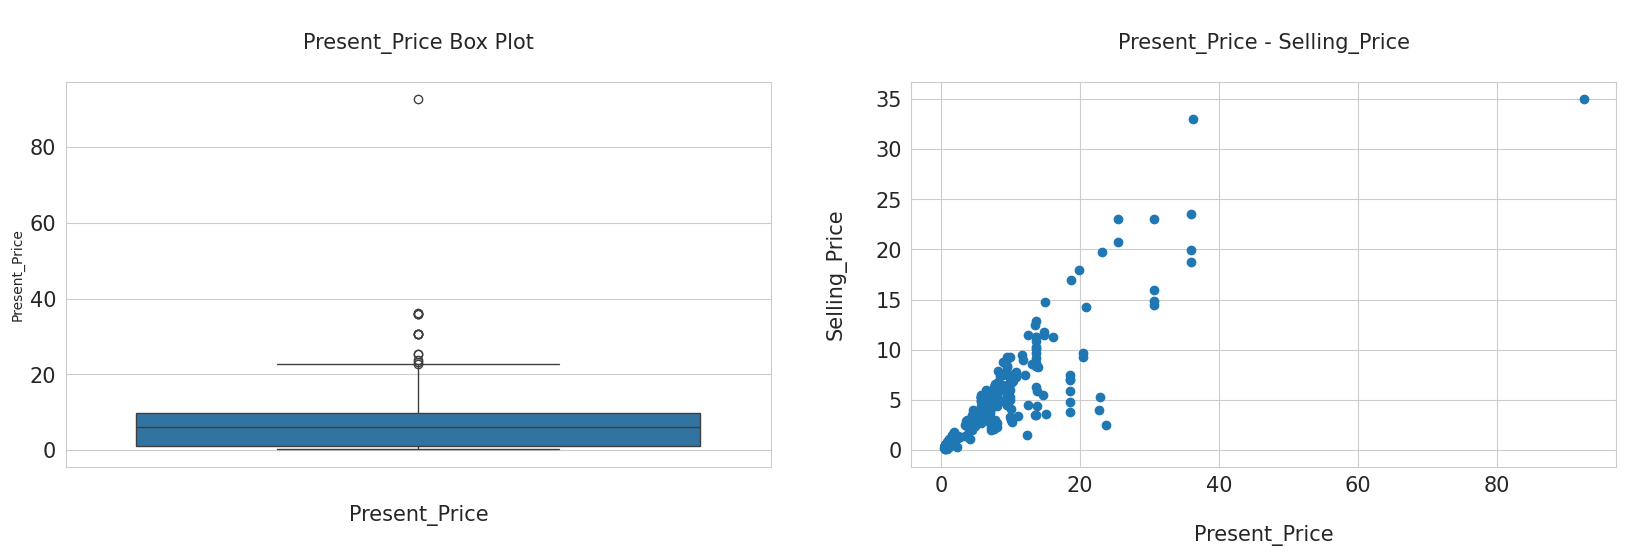

In [36]:
# call Numerical_Plot fuction for Present_Price

Numerical_Plot("Present_Price")

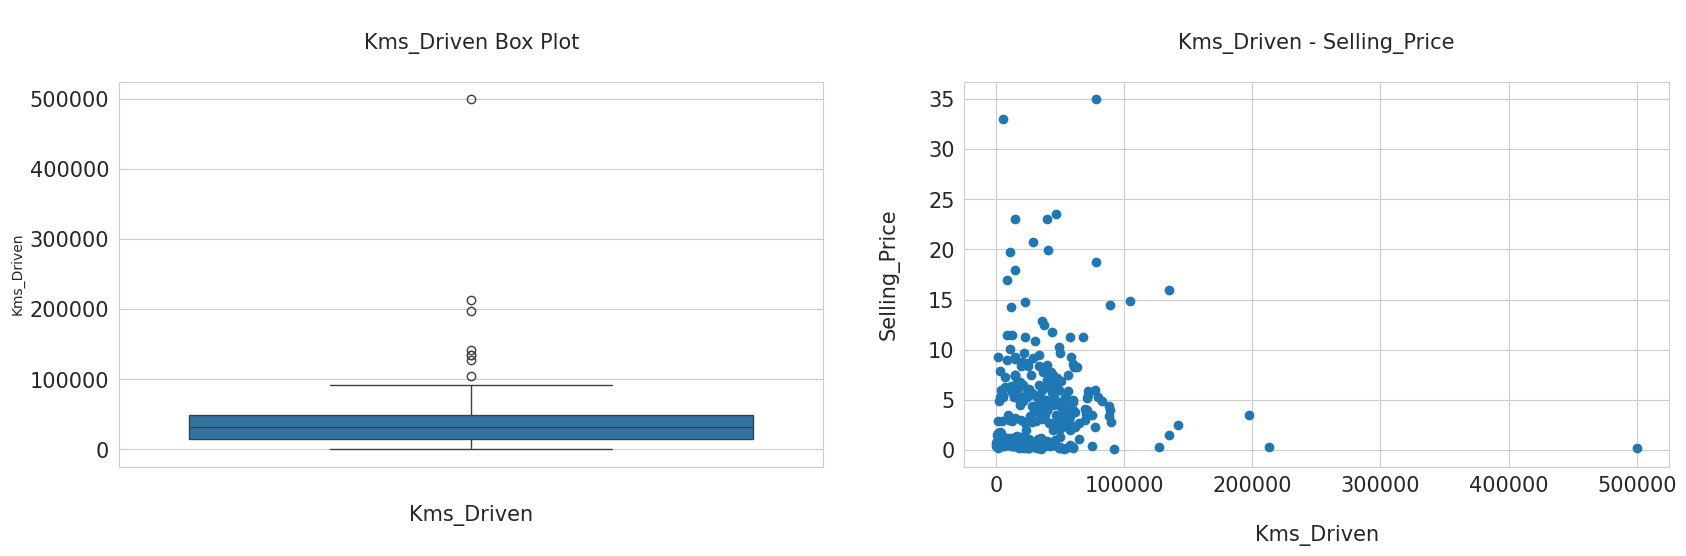

In [37]:
# call Numerical_Plot fuction for Kms_Driven

Numerical_Plot("Kms_Driven")

#### Bivariate Analysis

<Figure size 2500x500 with 0 Axes>

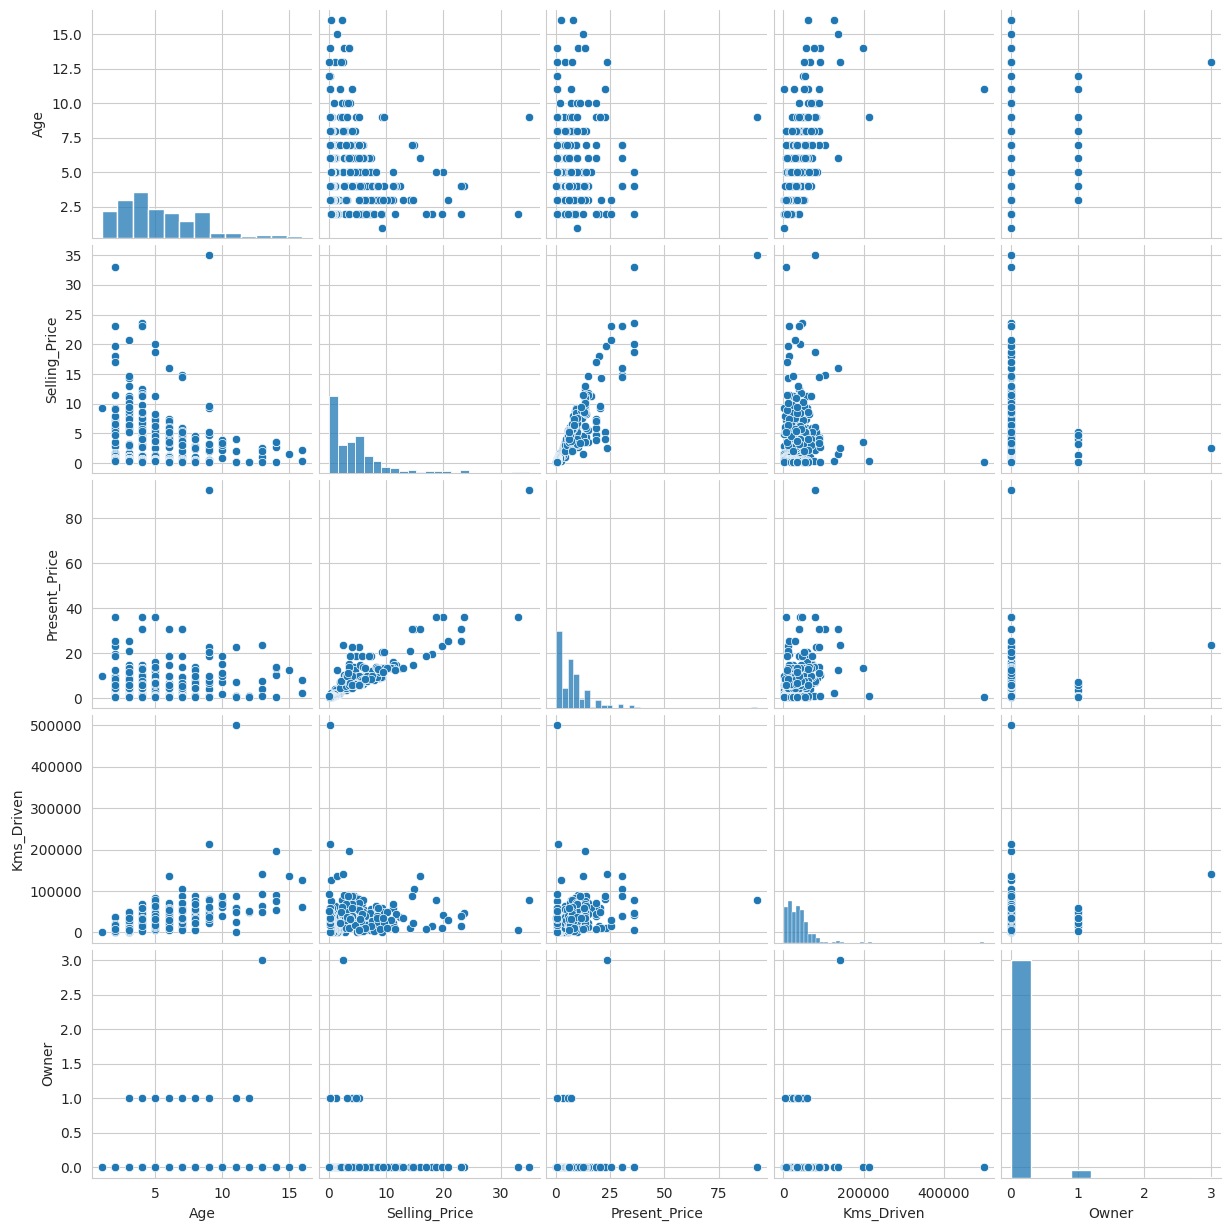

In [38]:
plt.figure(figsize=(25, 5))
sns.pairplot(numeric)
plt.show()

In [26]:
# Showing data correlation

numeric.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
Age,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000


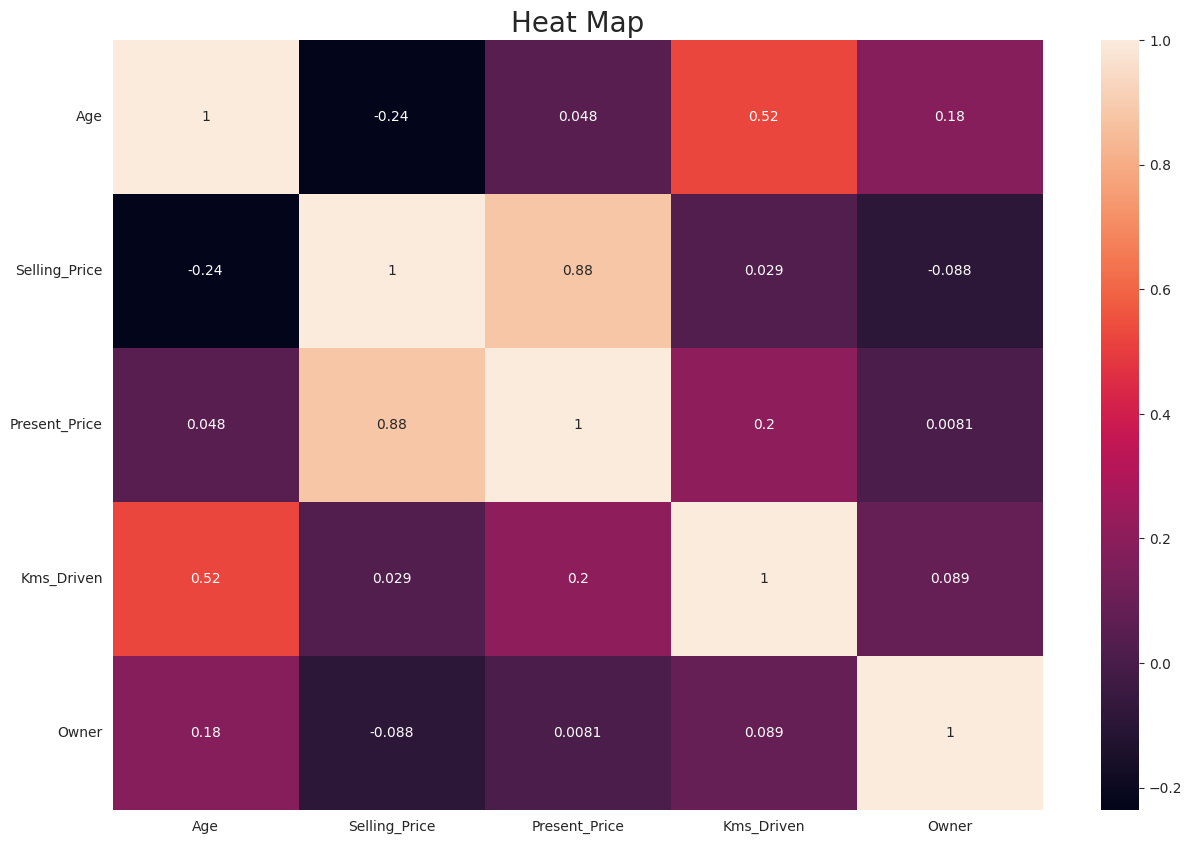

In [27]:
# draw Heat Map 

plt.figure(figsize=(15, 10))
sns.heatmap(numeric.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

#### Changing categorical features to numerical

In [39]:
# showing feature values

print("Fuel Type    = ", data.Fuel_Type.unique(),"\n")
print("Seller Type  = ", data.Seller_Type.unique(), "\n")
print("Transmission = ", data.Transmission.unique(), "\n")
print("Owner        = ", data.Owner.unique(), "\n")

Fuel Type    =  ['Petrol' 'Diesel' 'CNG'] 

Seller Type  =  ['Dealer' 'Individual'] 

Transmission =  ['Manual' 'Automatic'] 

Owner        =  [0 1 3] 



In [40]:
# showing the count of Fuel_Type values

data.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [41]:
# showing the count of Seller_Type values

data.Seller_Type.value_counts()

Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64

In [42]:
# showing the count of Transmission values

data.Transmission.value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [43]:
# showing the count of Owner values

data.Owner.value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

In [44]:
# changing categorical features to numerical

data["Fuel_Type"].replace({'Petrol':2, 'Diesel':3, 'CNG':4},inplace = True)
data["Seller_Type"].replace({'Dealer':2, 'Individual':3}, inplace = True)
data["Transmission"].replace({'Manual':2, 'Automatic':3}, inplace = True)
data.drop("Car_Name", axis=1, inplace = True)

data

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2,2,2,0
1,6,4.75,9.54,43000,3,2,2,0
2,2,7.25,9.85,6900,2,2,2,0
3,8,2.85,4.15,5200,2,2,2,0
4,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,3,2,2,0
297,4,4.00,5.90,60000,2,2,2,0
298,10,3.35,11.00,87934,2,2,2,0
299,2,11.50,12.50,9000,3,2,2,0


In [45]:
# cheking the features changes

print("Fuel Type    = ", pd.unique(data["Fuel_Type"]))
print("Seller Type  = ", pd.unique(data["Seller_Type"]))
print("Transmission = ", pd.unique(data["Transmission"]))
print("Owner        = ", pd.unique(data["Owner"]))

Fuel Type    =  [2 3 4]
Seller Type  =  [2 3]
Transmission =  [2 3]
Owner        =  [0 1 3]


In [46]:
# Showing data columns Data Type

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Kms_Driven     299 non-null    int64  
 4   Fuel_Type      299 non-null    int64  
 5   Seller_Type    299 non-null    int64  
 6   Transmission   299 non-null    int64  
 7   Owner          299 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 21.0 KB


In [47]:
data.describe(include = 'all')

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.384615,4.589632,7.541037,36916.752508,2.207358,2.354515,2.130435,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.422297,0.479168,0.337346,0.248720
min,1.000000,0.100000,0.320000,500.000000,2.000000,2.000000,2.000000,0.000000
25%,3.000000,0.850000,1.200000,15000.000000,2.000000,2.000000,2.000000,0.000000
50%,5.000000,3.510000,6.100000,32000.000000,2.000000,2.000000,2.000000,0.000000
75%,7.000000,6.000000,9.840000,48883.500000,2.000000,3.000000,2.000000,0.000000
max,16.000000,35.000000,92.600000,500000.000000,4.000000,3.000000,3.000000,3.000000


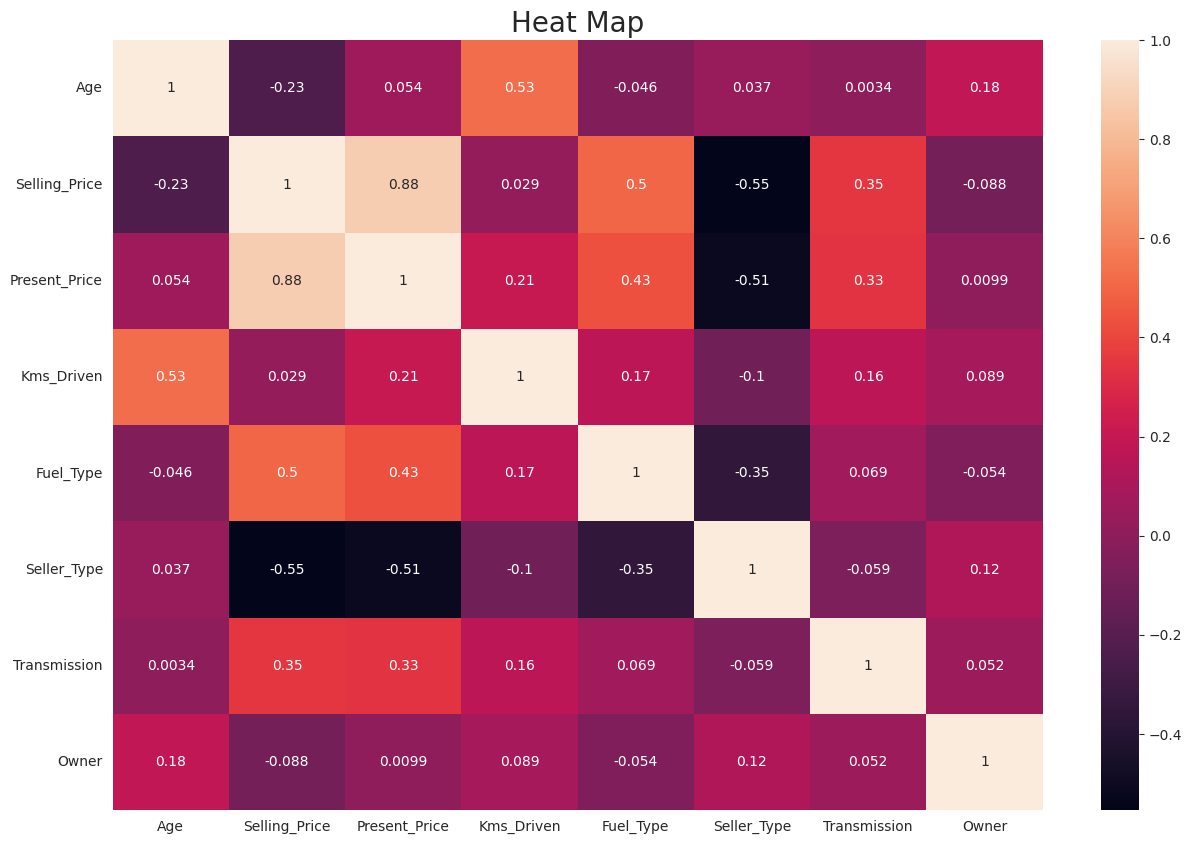

In [48]:
# Heat Map for correlation

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.yticks(rotation = 0)
plt.title('Heat Map', size=20)
plt.show()

### Data Modeling

In [49]:
x = pd.DataFrame(data, columns = ['Age','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
y = data['Selling_Price'].values.reshape(-1, 1)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [56]:
Y_pred = model.predict(X_test)

In [57]:
model.intercept_

array([0.28670452])

In [58]:
model.coef_

array([[-4.07380030e-01,  4.39153654e-01, -6.42548797e-06,
         1.46462072e+00, -1.27475586e+00,  1.51149686e+00,
        -6.70237886e-01]])

In [59]:
# Evalutions

# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))

# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))

# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

#R2 Score
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error     :  1.1712110344684783
Mean Squared Error      :  2.8605075270493177
Root Mean Squared Error :  1.6913034993901355
R2 Score                :  0.8193273850649259


#### Plots

In [66]:
X_test.insert(0, "Y_test", Y_test)
X_test.insert(0, "Y_pred", Y_pred)

In [67]:
df = X_test.sort_values(by="Present_Price")

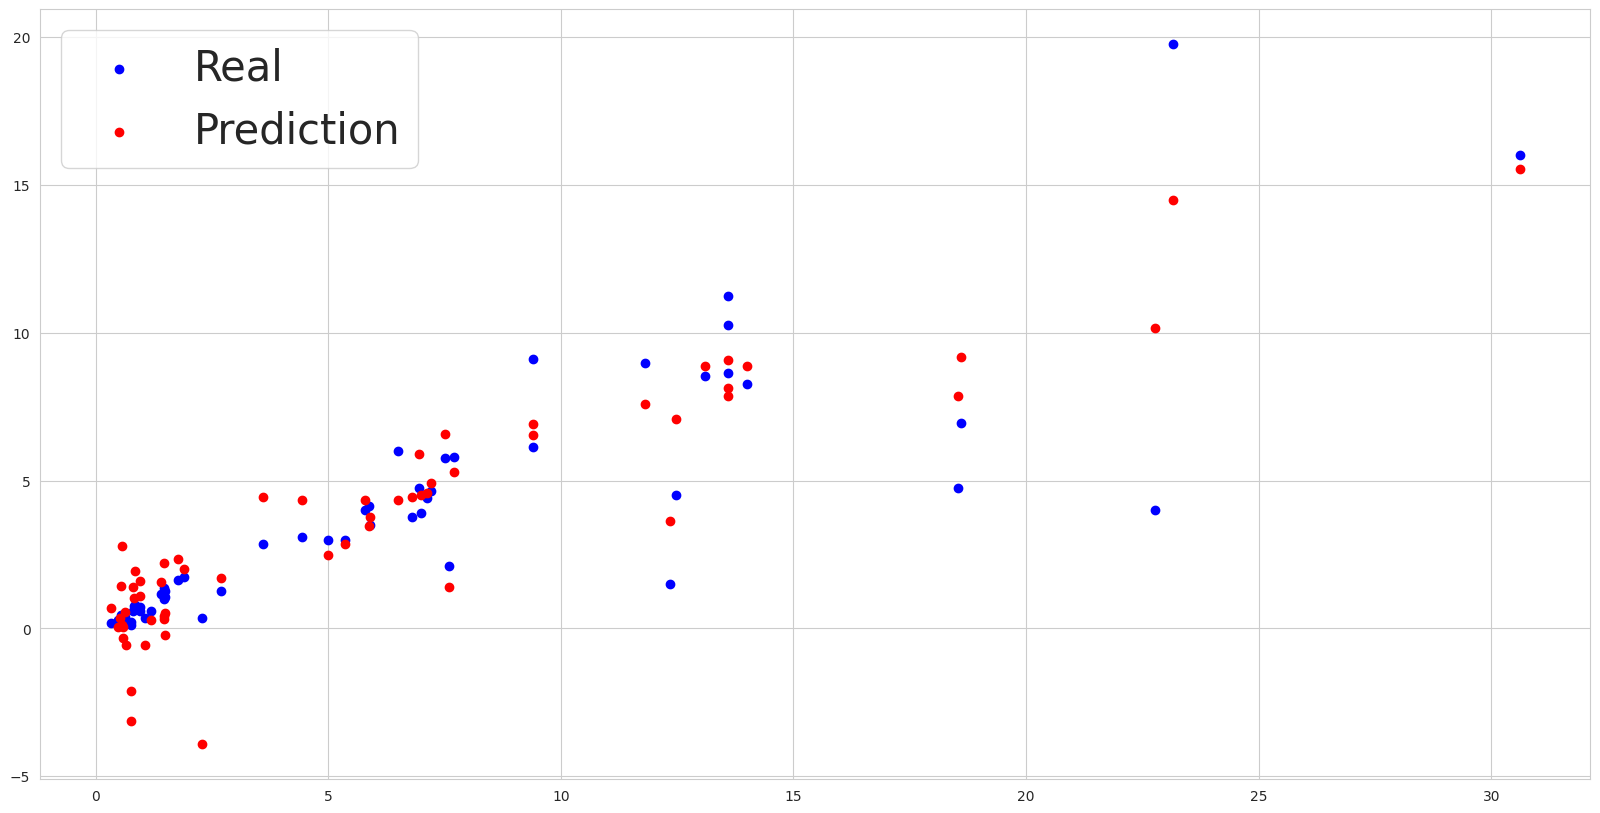

In [68]:
# checking the model by visualization

plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price ,df.Y_test, color='blue', label="Real")
plt.scatter(df.Present_Price, df.Y_pred, color='red', label="Prediction")
plt.legend(fontsize=30)
plt.show()

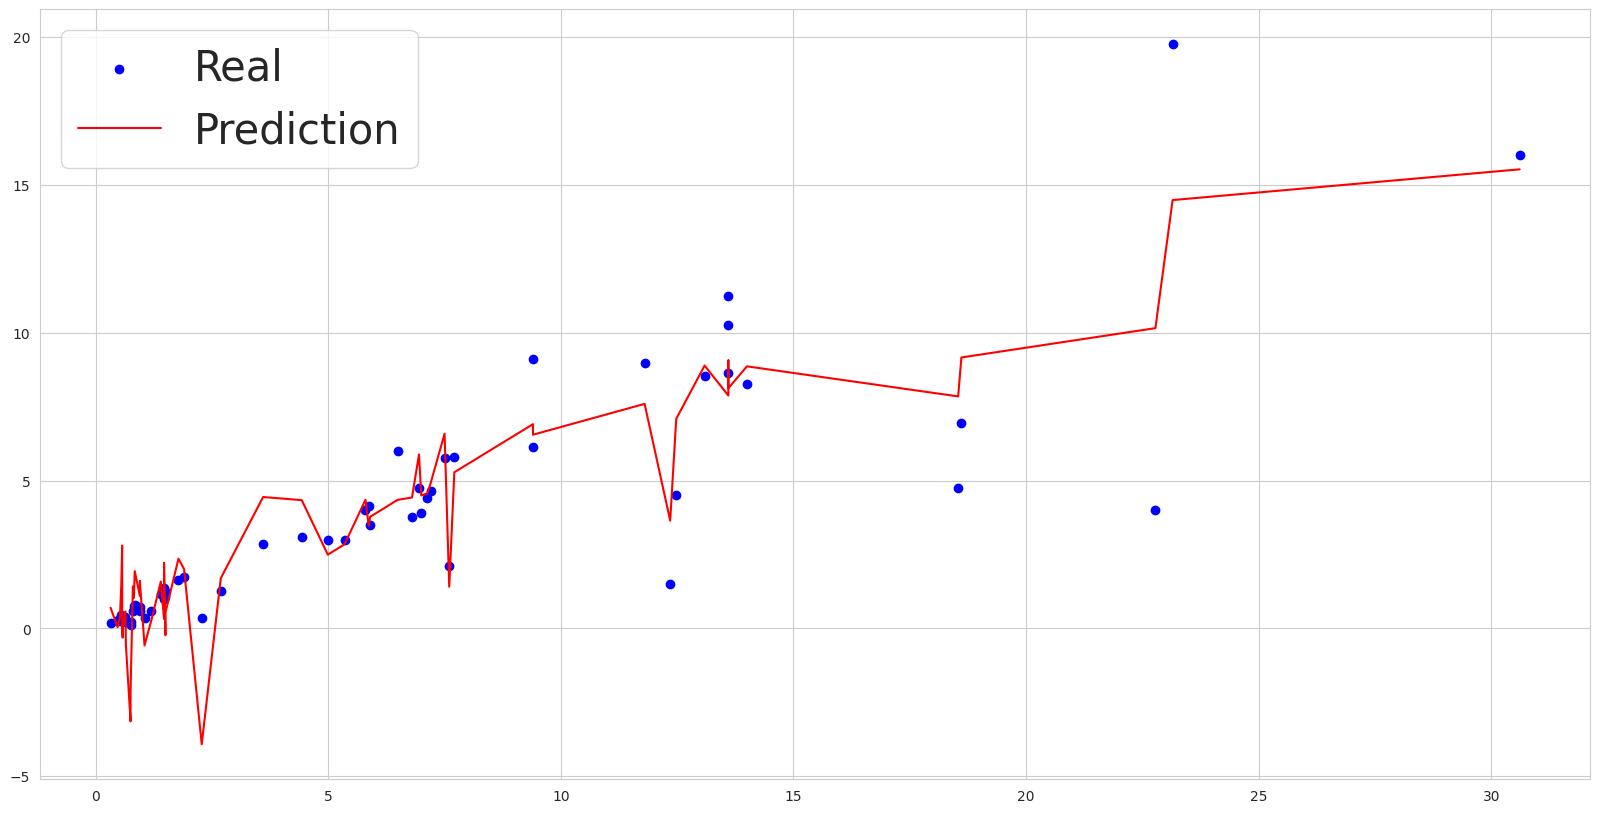

In [69]:
# checking the model by visualization

plt.figure(figsize=(20, 10))
plt.scatter(df.Present_Price , df.Y_test, color='blue', label="Real")
plt.plot(df.Present_Price, df.Y_pred, color='red', label="Prediction")
plt.legend(fontsize=30)
plt.show()